<center><h1> Titanic</h1>
    <h2>The Story of the Un-Sinkable Ship</h2>
</center>
<img src="titanic_banner.gif">

Add details on the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load Dataset

In [2]:
df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

### Sample records

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Cabin seems to have lots of missing data, as do attributes like Age and Embarked.

## Story Begins...

### Visualising missing values using heatmaps

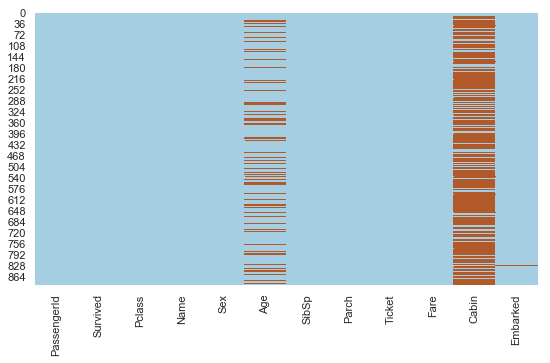

In [5]:
# set plotting canvas to 9x5 dimensions
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False,cmap=sns.color_palette("Paired"))
plt.show()

### Who Survived?

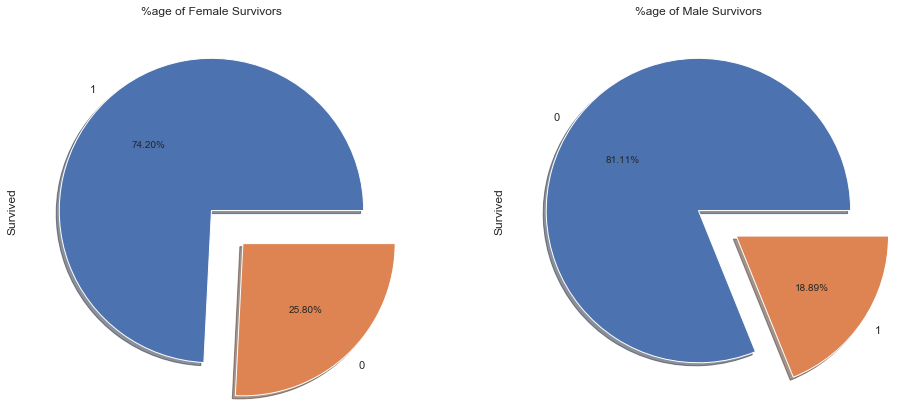

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

df['Survived'][df['Sex'] == 'female'].value_counts().plot.pie(
    explode=[0, 0.3], autopct='%1.2f%%', ax=ax[0], shadow=True)

df['Survived'][df['Sex'] == 'male'].value_counts().plot.pie(
    explode=[0, 0.3], autopct='%1.2f%%', ax=ax[1], shadow=True)

ax[0].set_title('%age of Female Survivors')
ax[1].set_title('%age of Male Survivors')

plt.show()

_* Humans are bad at reading angles. Use Pie Charts carefully.
See more here: https://www.geckoboard.com/blog/pie-charts/_

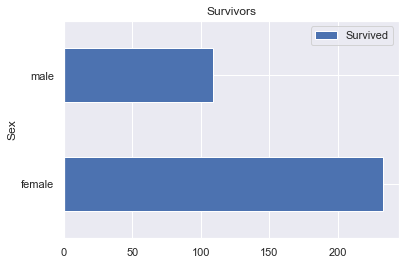

In [7]:
df.groupby('Sex').agg({'Survived':'sum'}).plot(kind='barh')
plt.title('Survivors')
plt.show()

Women were more likely to survive than men

### Does Money make you Safer?

In [8]:
pd.crosstab(
    df.Pclass, df.Survived,
    margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [9]:
print("% of survivals in")
print("Pclass=1 : {}%".format(
    round(
        df.Survived[df.Pclass == 1].sum() /
        df[df.Pclass == 1].Survived.count(), 5) * 100))
print("Pclass=2 : {}%".format(
    round(
        df.Survived[df.Pclass == 2].sum() /
        df[df.Pclass == 2].Survived.count(), 5) * 100))
print("Pclass=3 : {}%".format(
    round(
        df.Survived[df.Pclass == 3].sum() /
        df[df.Pclass == 3].Survived.count(), 5) * 100))

% of survivals in
Pclass=1 : 62.963%
Pclass=2 : 47.282999999999994%
Pclass=3 : 24.236%


### Did Point of Embarkation have any impact?

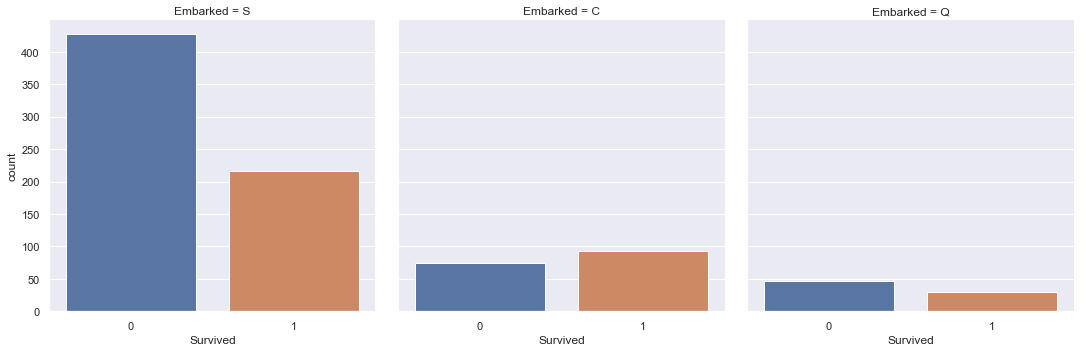

In [10]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df)

### Cross Tab of Class, Gender and Embarkation point with Survival

In [11]:
pd.crosstab(
    index=[df.Survived],
    columns=[df.Sex, df.Pclass, df.Embarked],
    margins=True).style.background_gradient(cmap='summer_r')

__Insights__
+ Almost all women from Pclass 2 who embarked at C and Q survived
+ Nearly all women of Pclass 1 survived.
+ All men of Pclass 1 and 2 who embarked at Q died!

### Age Distribution

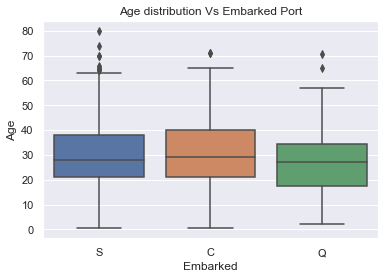

In [18]:
sns.boxplot(x='Embarked', y='Age', data=df)
plt.title("Age distribution Vs Embarked Port")
plt.show()

### Advanced Plots: Swarm/Violin Plots

In [27]:
cm_surv = ["grey" , "green"]

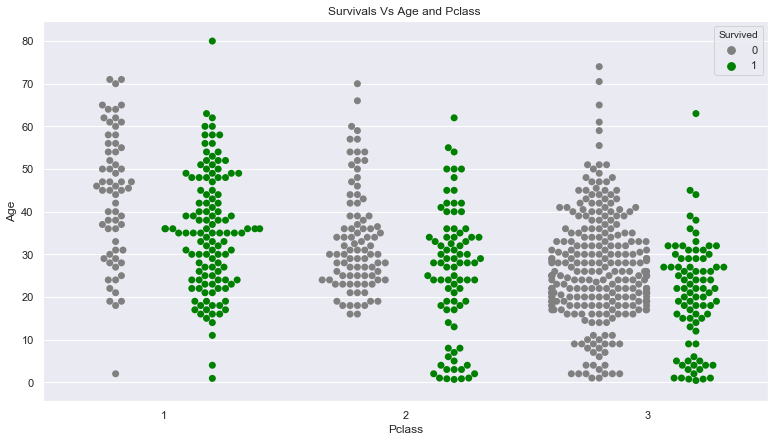

In [28]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=df , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals Vs Age and Pclass ')
plt.show()

Kids across Class were saved more than any other category

### How were the Tickets Priced?

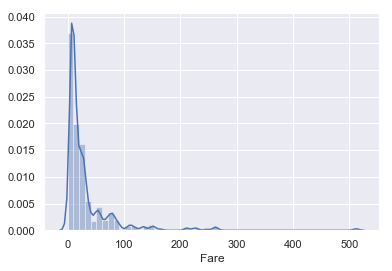

In [12]:
sns.distplot(df['Fare']);

### Correlation between attributes

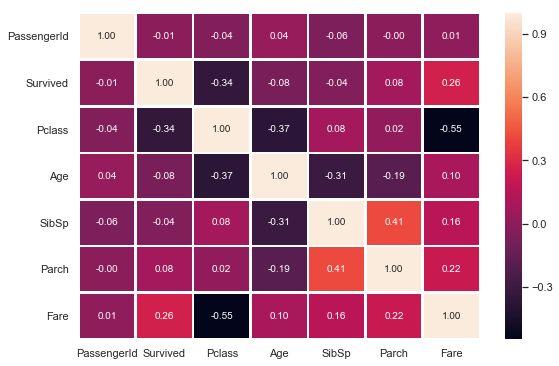

In [13]:
corr = df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

We see a lot of negative correlations.
With most columns being categorical, we need to perform some transformations

In [15]:
# add bins for fare and age
df_ml = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_ml.dropna(inplace=True)

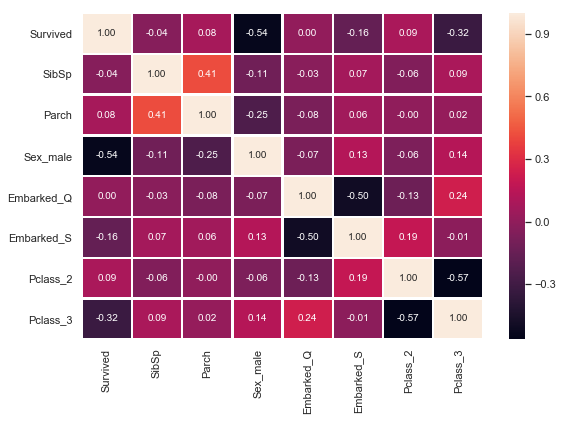

In [16]:
corr = df_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()